Temperature (numeric): Suhu dalam derajat Celsius, berkisar dari sangat dingin hingga sangat panas.

Humidity (numeric): Persentase kelembaban, termasuk nilai di atas 100% untuk memperkenalkan pencilan.

Wind Speed (numeric): Kecepatan angin dalam kilometer per jam, dengan rentang yang mencakup nilai yang sangat tinggi dan tidak realistis.

Precipitation (%) (numeric): Persentase curah hujan, termasuk nilai pencilan.

Cloud Cover (categorical): Deskripsi tingkat tutupan awan.

Atmospheric Pressure (numeric): Tekanan atmosfer dalam hPa, mencakup rentang yang luas.

UV Index (numeric): Indeks UV, menunjukkan kekuatan radiasi ultraviolet.

Season (categorical): Musim saat data direkam.

Visibility (km) (numeric): Jarak pandang dalam kilometer, termasuk nilai yang sangat rendah atau sangat tinggi.

Location (categorical): Jenis lokasi tempat data direkam.

Weather Type (categorical): Variabel target untuk klasifikasi, menunjukkan jenis cuaca




In [2]:
import pandas as pd
import numpy as np
import math
import random
from scipy.stats  import pearsonr, jarque_bera
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [3]:
df = pd.read_csv('hujan.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.info()
data = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.shape

(13200, 11)

In [6]:
df.nunique()

,0
Temperature,126
Humidity,90
Wind Speed,97
Precipitation (%),110
Cloud Cover,4
Atmospheric Pressure,5456
UV Index,15
Season,4
Visibility (km),41
Location,3


In [7]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [8]:
df['Cloud Cover'].unique()


array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [9]:
df['UV Index'].unique()

array([ 2,  7,  5,  1,  0,  8, 11,  3,  9,  4, 13, 10, 14,  6, 12])

In [10]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [12]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [13]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [16]:
df['Cloud Cover'] = df['Cloud Cover'].replace({
    'partly cloudy':0,
    'clear':1,
    'overcast':2,
    'cloudy':3
})
df['Season'] = df['Season'].replace({
    'Summer':0,
    'Autumn':1,
    'Winter':2,
    'Spring':3
})
df['Location'] = df['Location'].replace({
    'inland':0,
    'mountain':1,
    'coastal':2
})

df['Weather Type'] = df['Weather Type'].replace({
    'Rainy':0,
    'Cloudy':1,
    'Sunny':2,
    'Snowy':3,

})

In [17]:
df['Cloud Cover'] = df['Cloud Cover'].astype('int')
df['Season'] = df['Season'].astype('int')
df['Location'] = df['Location'].astype('int')
df['Weather Type'] = df['Weather Type'].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int64  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int64  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int64  
 10  Weather Type          13200 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.1 MB


In [19]:
 df.duplicated().sum()

0

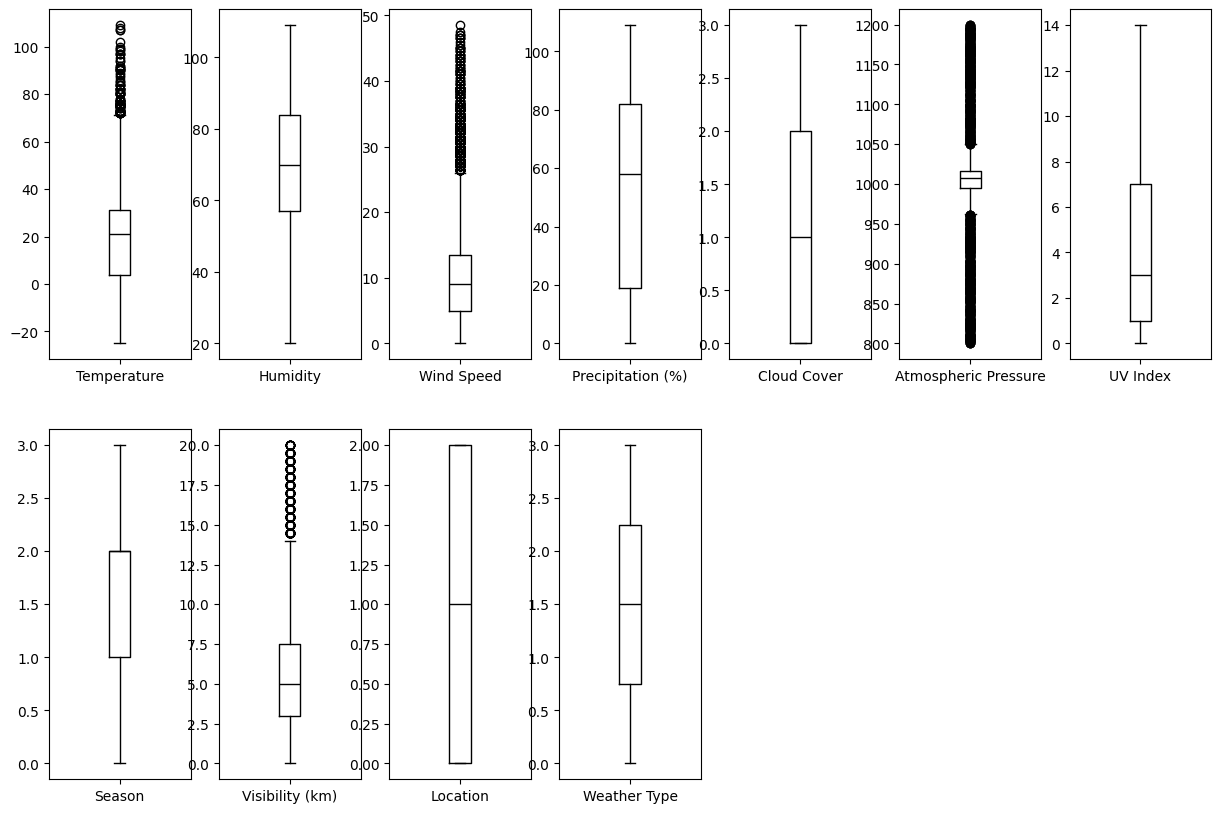

In [20]:
df.plot(kind='box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (15,10), color='k')
plt.show()

In [24]:
import numpy as np

countinous_features = ['Temperature',  'Wind Speed','Atmospheric Pressure','Visibility (km)']

def outliers(df, drop=False):
    for each_feature in countinous_features:
        if each_feature in df.columns:
            feature_data = df[each_feature]
            Q1 = np.percentile(feature_data, 25.)
            Q3 = np.percentile(feature_data, 75.)
            IQR = Q3 - Q1
            outlier_step = IQR * 1.5
            outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()

            if not drop:
                print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
            else:
                df.drop(outliers, inplace=True, errors='ignore')
                print('Outliers from {} feature removed'.format(each_feature))


In [25]:
outliers(df[countinous_features],drop=True)


Outliers from Temperature feature removed
Outliers from Wind Speed feature removed
Outliers from Atmospheric Pressure feature removed
Outliers from Visibility (km) feature removed


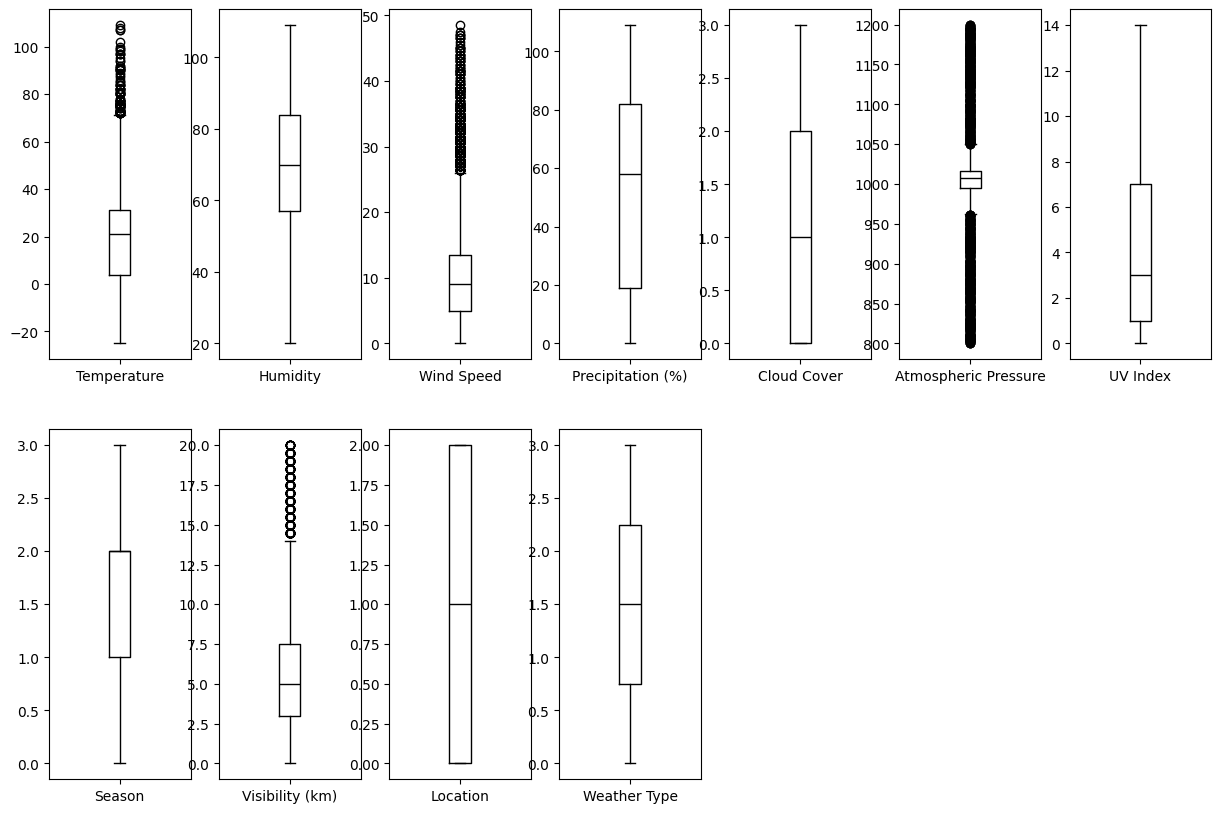

In [26]:
df.plot(kind ='box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (15,10), color ='k')
plt.show()

In [29]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1.178182,1005.827896,4.005758,1.629848,5.462917,0.905682,1.500000
std,17.386327,20.194248,6.908704,31.946541,0.948516,37.199589,3.856600,1.002211,3.371499,0.791537,1.118076
min,-25.000000,20.000000,0.000000,0.000000,0.000000,800.120000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,0.000000,994.800000,1.000000,1.000000,3.000000,0.000000,0.750000
50%,21.000000,70.000000,9.000000,58.000000,1.000000,1007.650000,3.000000,2.000000,5.000000,1.000000,1.500000
75%,31.000000,84.000000,13.500000,82.000000,2.000000,1016.772500,7.000000,2.000000,7.500000,2.000000,2.250000
max,109.000000,109.000000,48.500000,109.000000,3.000000,1199.210000,14.000000,3.000000,20.000000,2.000000,3.000000


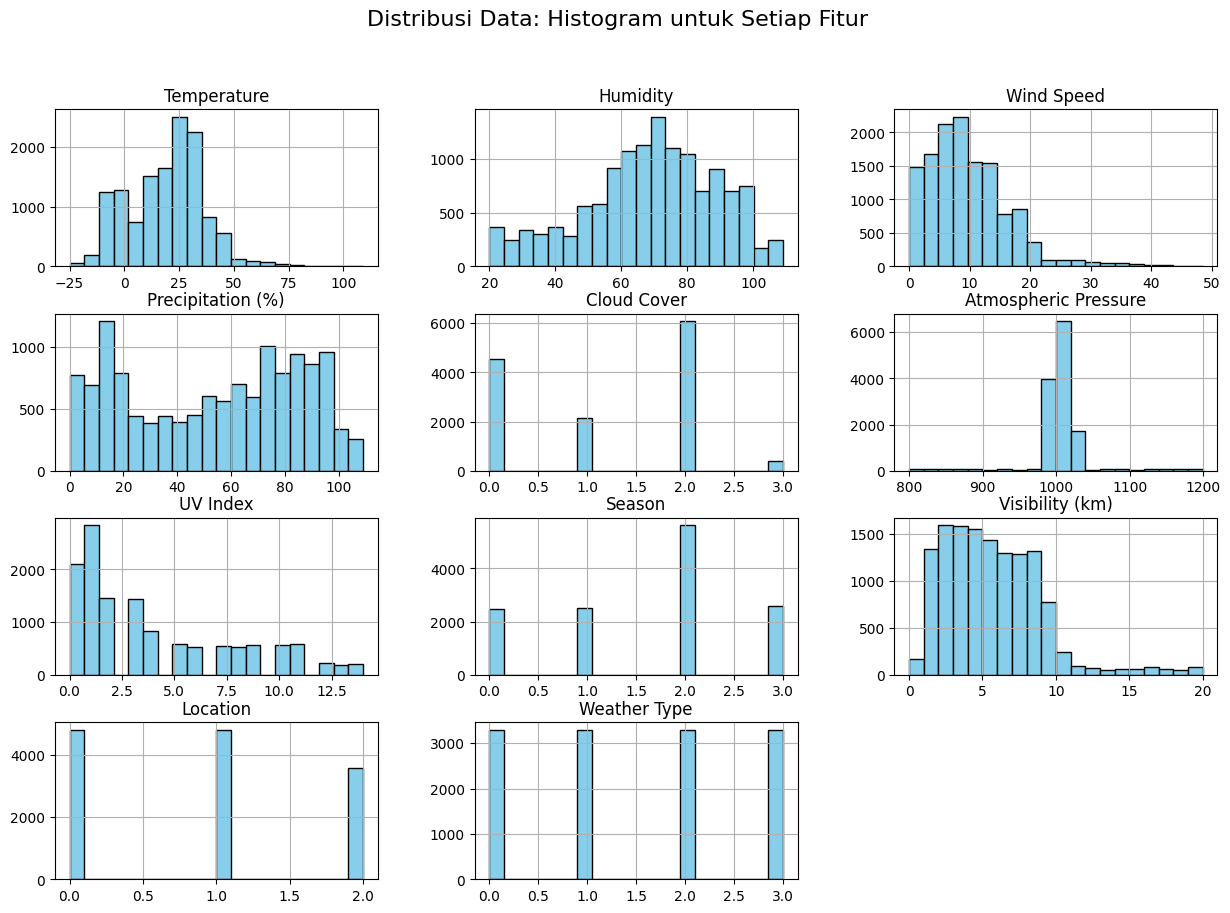

In [30]:
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Data: Histogram untuk Setiap Fitur', fontsize=16)
plt.show()


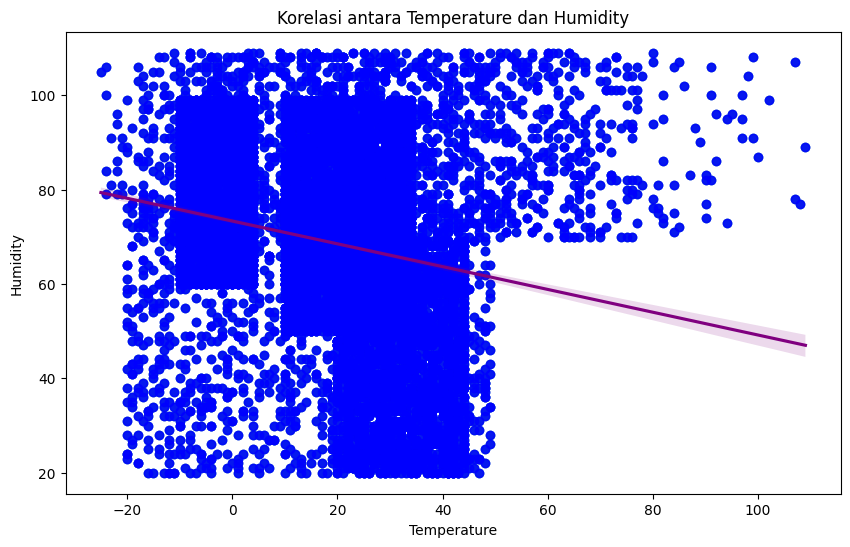

In [31]:
#melihat korelasi antara temperature dengan humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Humidity'])
sns.regplot(data=df, x='Temperature', y='Humidity', scatter_kws={'color': 'blue'}, line_kws={'color': 'purple'})
plt.title('Korelasi antara Temperature dan Humidity')

plt.show()

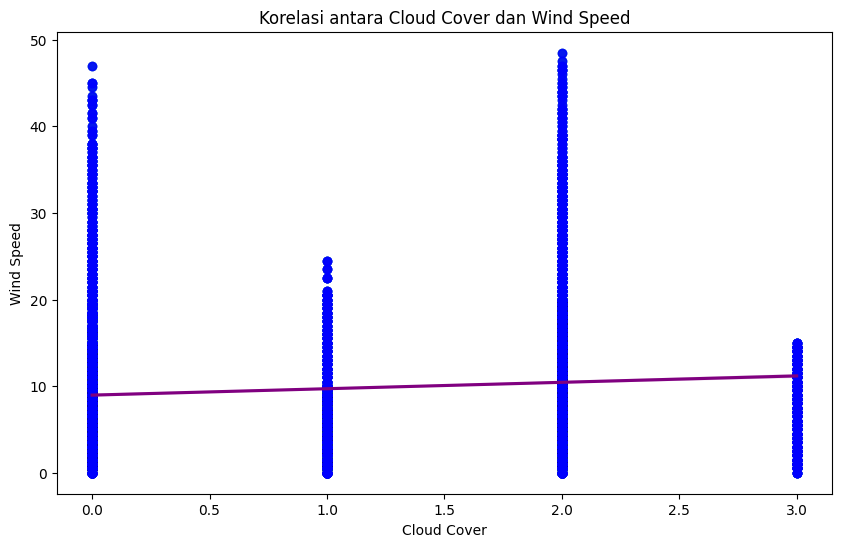

In [35]:
#melihat korelasi antara temperature dengan humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['Cloud Cover'], df['Wind Speed'])
sns.regplot(data=df, x='Cloud Cover', y='Wind Speed', scatter_kws={'color': 'blue'}, line_kws={'color': 'purple'})
plt.title('Korelasi antara Cloud Cover dan Wind Speed')

plt.show()

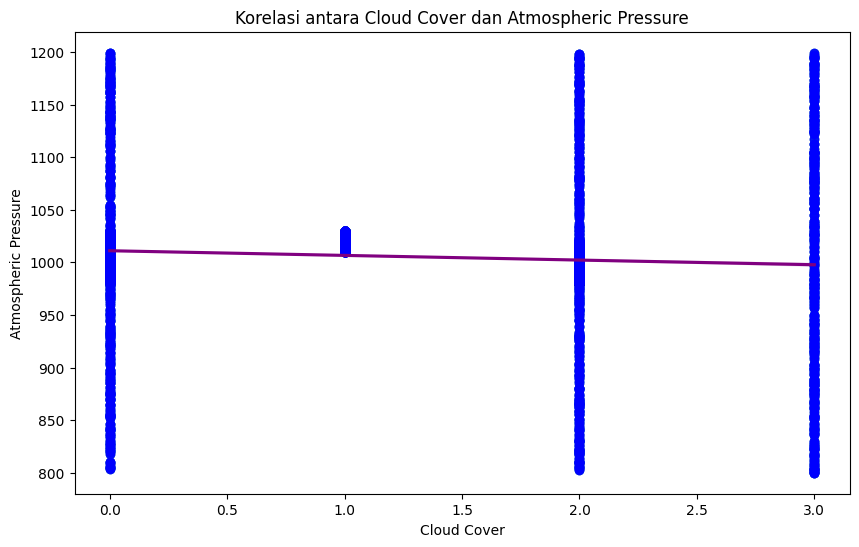

In [36]:
#melihat korelasi antara temperature dengan humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['Cloud Cover'], df['Atmospheric Pressure'])
sns.regplot(data=df, x='Cloud Cover', y='Atmospheric Pressure', scatter_kws={'color': 'blue'}, line_kws={'color': 'purple'})
plt.title('Korelasi antara Cloud Cover dan Atmospheric Pressure')

plt.show()

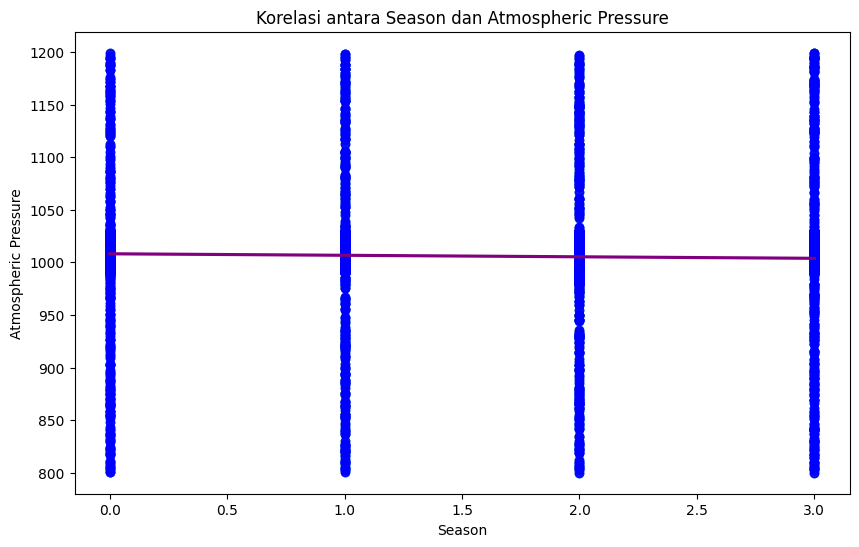

In [37]:
#melihat korelasi antara temperature dengan humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['Season'], df['Atmospheric Pressure'])
sns.regplot(data=df, x='Season', y='Atmospheric Pressure', scatter_kws={'color': 'blue'}, line_kws={'color': 'purple'})
plt.title('Korelasi antara Season dan Atmospheric Pressure')

plt.show()

Data Analyst

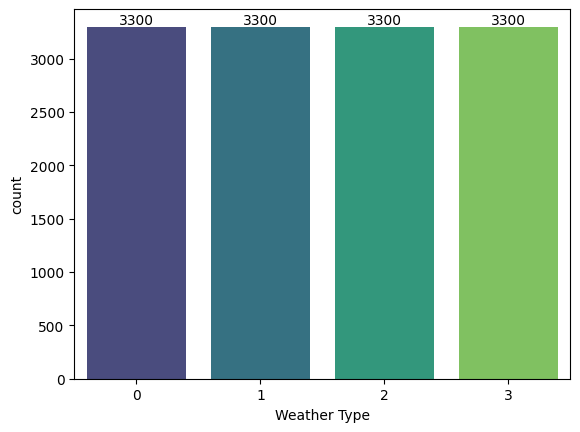

In [39]:
#Memeriksa data Imbalance
ax = sns.countplot(x='Weather Type', data=df, palette='viridis')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

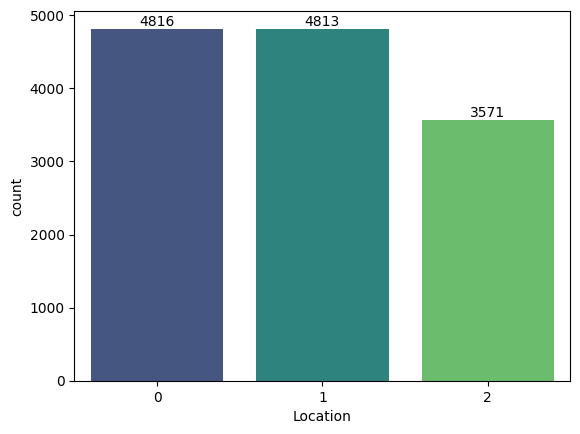

In [40]:
#Memeriksa data Imbalance
ax = sns.countplot(x='Location', data=df, palette='viridis')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

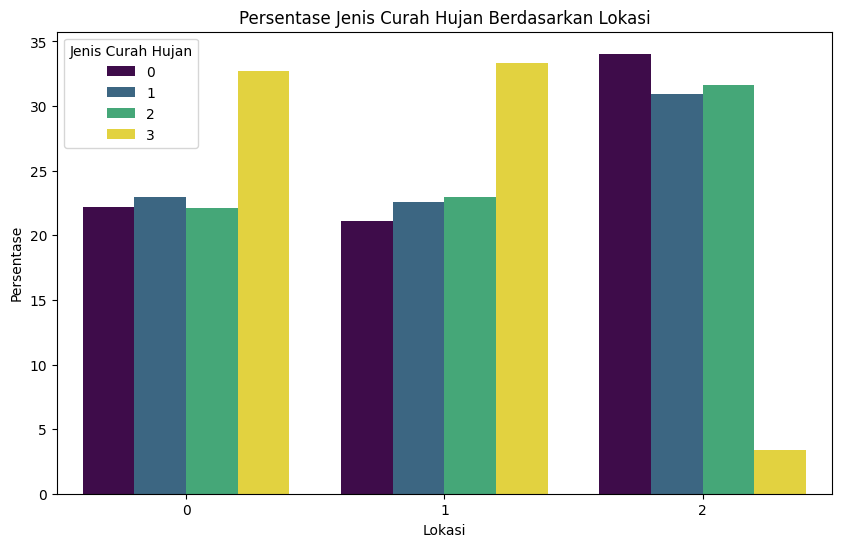

In [41]:
lokasi_curah_hujan = df.groupby(['Location', 'Weather Type'])['Weather Type'].count().reset_index(name='Jumlah')
total_curah_hujan_lokasi = lokasi_curah_hujan.groupby('Location')['Jumlah'].transform('sum')
lokasi_curah_hujan['Persentase'] = (lokasi_curah_hujan['Jumlah'] / total_curah_hujan_lokasi) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Persentase', hue='Weather Type', data=lokasi_curah_hujan, palette='viridis')
plt.title('Persentase Jenis Curah Hujan Berdasarkan Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Persentase')
plt.legend(title='Jenis Curah Hujan')
plt.show()

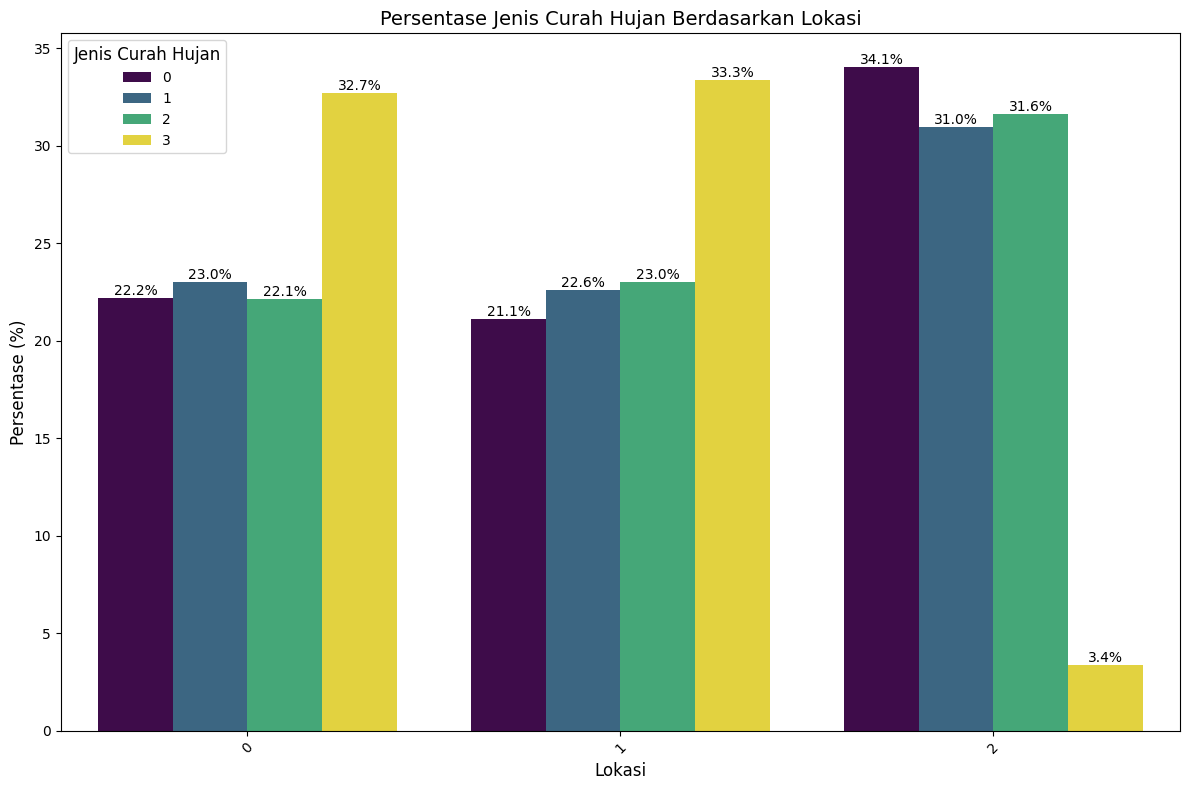

In [42]:
# Menghitung data
lokasi_curah_hujan = df.groupby(['Location', 'Weather Type'])['Weather Type'].count().reset_index(name='Jumlah')
total_curah_hujan_lokasi = lokasi_curah_hujan.groupby('Location')['Jumlah'].transform('sum')
lokasi_curah_hujan['Persentase'] = (lokasi_curah_hujan['Jumlah'] / total_curah_hujan_lokasi) * 100

# Membuat plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Location',
    y='Persentase',
    hue='Weather Type',
    data=lokasi_curah_hujan,
    palette='viridis'
)

# Menambahkan anotasi persentase pada setiap bar
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'{val:.1f}%' for val in container.datavalues],
        label_type='edge',
        fontsize=10,
        color='black'
    )

# Menambahkan detail plot
plt.title('Persentase Jenis Curah Hujan Berdasarkan Lokasi', fontsize=14)
plt.xlabel('Lokasi', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.legend(title='Jenis Curah Hujan', fontsize=10, title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Menampilkan plot
plt.show()

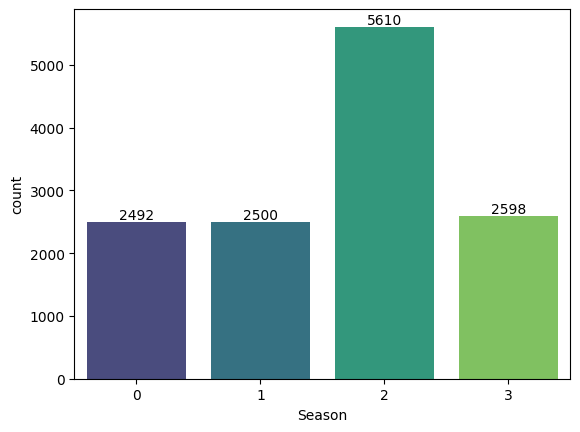

In [43]:
#Memeriksa data Imbalance
ax = sns.countplot(x='Season', data=df, palette='viridis')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

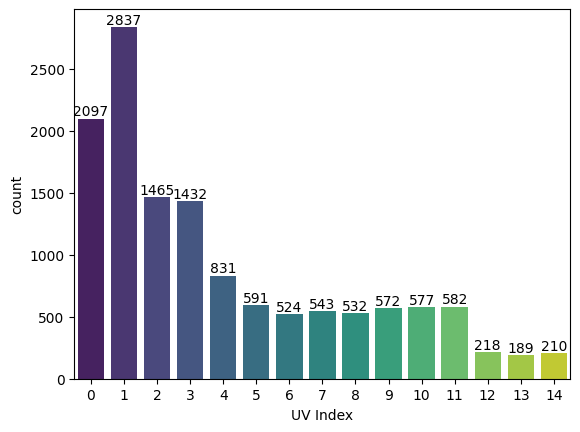

In [44]:
#Memeriksa data Imbalance
ax = sns.countplot(x='UV Index', data=df, palette='viridis')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

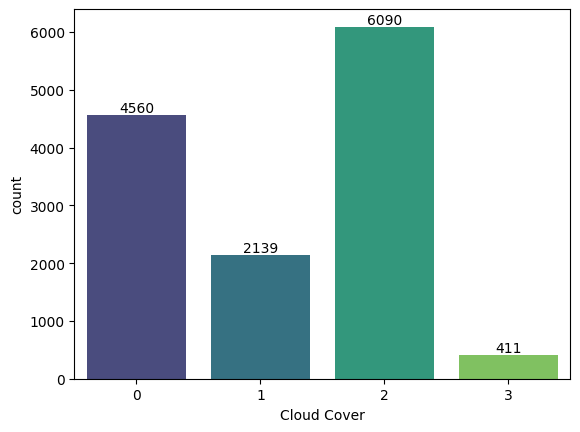

In [45]:
#Memeriksa data Imbalance
ax = sns.countplot(x='Cloud Cover', data=df, palette='viridis')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

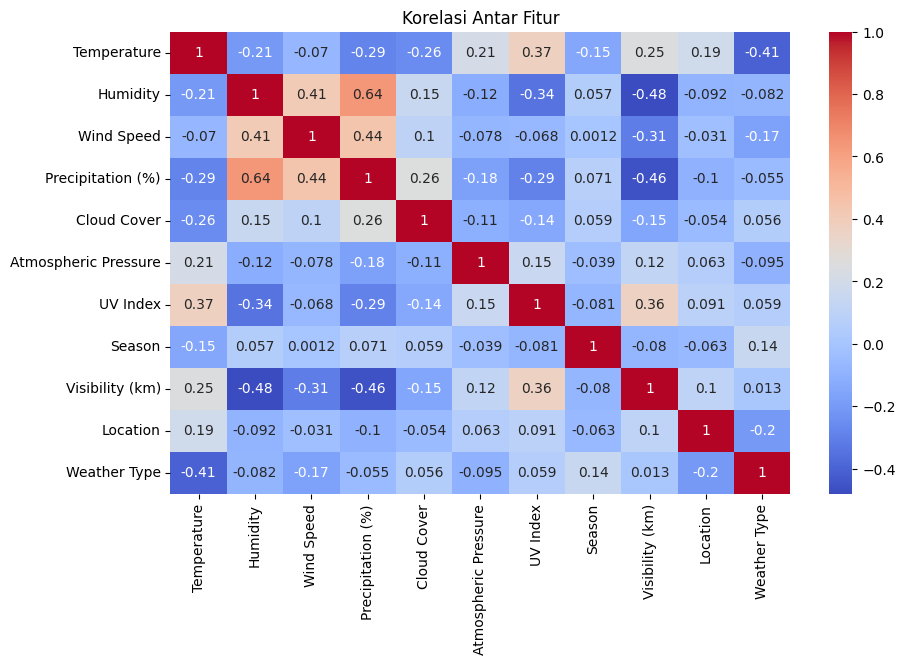

In [46]:
#melihat korelasi antara variabel untuk mencari feature yang penting
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [47]:

cor_matrix = df.corr()
cor_matrix

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
Temperature,1.000000,-0.207969,-0.070022,-0.287206,-0.255247,0.209188,0.374773,-0.147853,0.250751,0.189524,-0.407396
Humidity,-0.207969,1.000000,0.406079,0.638631,0.145574,-0.120653,-0.342694,0.056849,-0.479969,-0.092175,-0.081860
Wind Speed,-0.070022,0.406079,1.000000,0.443770,0.101455,-0.077757,-0.068147,0.001199,-0.311828,-0.031476,-0.172076
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,0.257138,-0.177444,-0.291601,0.070986,-0.457444,-0.100080,-0.055412
Cloud Cover,-0.255247,0.145574,0.101455,0.257138,1.000000,-0.113061,-0.143955,0.059025,-0.151395,-0.053803,0.056223
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,-0.113061,1.000000,0.154128,-0.038501,0.120182,0.062520,-0.094754
UV Index,0.374773,-0.342694,-0.068147,-0.291601,-0.143955,0.154128,1.000000,-0.080776,0.362922,0.090593,0.058527
Season,-0.147853,0.056849,0.001199,0.070986,0.059025,-0.038501,-0.080776,1.000000,-0.079861,-0.063209,0.144421
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,-0.151395,0.120182,0.362922,-0.079861,1.000000,0.104598,0.012547
Location,0.189524,-0.092175,-0.031476,-0.100080,-0.053803,0.062520,0.090593,-0.063209,0.104598,1.000000,-0.202935


In [48]:
cor_matrix['Weather Type'].sort_values()

,Weather Type
Temperature,-0.407396
Location,-0.202935
Wind Speed,-0.172076
Atmospheric Pressure,-0.094754
Humidity,-0.081860
Precipitation (%),-0.055412
Visibility (km),0.012547
Cloud Cover,0.056223
UV Index,0.058527
Season,0.144421


Memisahkan Variable dependen dan indepen

In [50]:
X = df.drop(['Weather Type'],axis=1)
y = df['Weather Type']

In [51]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,0,1010.82,2,2,3.5,0
1,39.0,96,8.5,71.0,0,1011.43,7,3,10.0,0
2,30.0,64,7.0,16.0,1,1018.72,5,3,5.5,1
3,38.0,83,1.5,82.0,1,1026.25,7,3,1.0,2
4,27.0,74,17.0,66.0,2,990.67,1,2,2.5,1


In [52]:
y.head()

,Weather Type
0,0
1,1
2,2
3,2
4,0


Mendefinisikan Scaler

In [53]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
pd.DataFrame(x_scaled, columns=X.columns)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,-0.294931,0.212404,-0.048086,0.887629,-1.242178,0.134203,-0.520104,0.369349,-0.582231,-1.144250
1,1.143035,1.351385,-0.192836,0.543291,-1.242178,0.150602,0.776424,1.367180,1.345768,-1.144250
2,0.625367,-0.233285,-0.409962,-1.178401,-0.187860,0.346579,0.257813,1.367180,0.010999,0.119163
3,1.085516,0.707613,-1.206089,0.887629,-0.187860,0.549008,0.776424,1.367180,-1.323769,1.382576
4,0.452811,0.261924,1.037543,0.386773,0.866458,-0.407490,-0.779410,0.369349,-0.878846,0.119163
...,...,...,...,...,...,...,...,...,...,...
13195,-0.525006,0.261924,0.675666,0.543291,0.866458,-0.071990,-0.779410,-1.626314,-1.323769,0.119163
13196,-1.157711,0.360966,-0.916588,-0.959276,1.920776,1.650675,-0.779410,0.369349,0.159307,1.382576
13197,0.625367,0.410487,-0.627087,-0.802759,0.866458,0.184474,-0.260799,-0.628483,1.049153,1.382576
13198,-0.927636,0.360966,0.024290,1.263271,0.866458,-0.579542,-1.038715,0.369349,-1.027154,-1.144250


Spliting data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [55]:
#Menampilkan hasil pemisahan berdasarkan kolom dan baris
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10560, 10)
X_test shape: (2640, 10)
y_train shape: (10560,)
y_test shape: (2640,)


In [56]:
#1
clf = LogisticRegression()

#train the classifier
clf.fit(X_train, y_train)

#predict the target variable
y_pred = clf.predict(X_test)

#printing the test accuracy
print("Test accuracy score of Logistric Regression Classifier is :", accuracy_score(y_test, y_pred))

Test accuracy score of Logistric Regression Classifier is : 0.8602272727272727


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       647
           1       0.84      0.82      0.83       651
           2       0.86      0.84      0.85       641
           3       0.90      0.94      0.92       701

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640



In [58]:
#2
dt = DecisionTreeClassifier()

#train the classifier
dt.fit(X_train, y_train)

#predict the target variable
y_pred = dt.predict(X_test)

#printing the test accuracy
print("Test accuracy score of DecisionTreeClassifier is :", accuracy_score(y_test, y_pred))

Test accuracy score of DecisionTreeClassifier is : 0.9068181818181819


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       647
           1       0.88      0.90      0.89       651
           2       0.93      0.90      0.91       641
           3       0.93      0.94      0.94       701

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [60]:
#3
rf = RandomForestClassifier()

#train the classifier
rf.fit(X_train, y_train)

#predict the target variable
y_pred = rf.predict(X_test)

#printing the test accuracy
print("Test accuracy score of RandomForestClassifier is :", accuracy_score(y_test, y_pred))

Test accuracy score of RandomForestClassifier is : 0.9140151515151516


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       647
           1       0.88      0.90      0.89       651
           2       0.94      0.90      0.92       641
           3       0.94      0.95      0.94       701

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [62]:
#4
mlp = MLPClassifier()

#train the classifier
mlp.fit(X_train, y_train)

#predict the target variable
y_pred = mlp.predict(X_test)

#printing the test accuracy
print("Test accuracy score of MLPClassifier is :", accuracy_score(y_test, y_pred))

Test accuracy score of MLPClassifier is : 0.9011363636363636


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       647
           1       0.87      0.89      0.88       651
           2       0.90      0.88      0.89       641
           3       0.94      0.94      0.94       701

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [64]:
#5
svm = SVC()

#train the classifier
svm.fit(X_train, y_train)

#predict the target variable
y_pred = svm.predict(X_test)

#printing the test accuracy
print("Test accuracy score of SupportVectorClassifier is :", accuracy_score(y_test, y_pred))

Test accuracy score of SupportVectorClassifier is : 0.9102272727272728


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       647
           1       0.88      0.90      0.89       651
           2       0.93      0.89      0.91       641
           3       0.94      0.94      0.94       701

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [66]:
#6
nb = GaussianNB()

#train the classifier
nb.fit(X_train, y_train)

#predict the target variable
y_pred = nb.predict(X_test)

#printing the test accuracy
print("Test accuracy score of GaussianNB is :", accuracy_score(y_test, y_pred))

Test accuracy score of GaussianNB is : 0.8628787878787879


In [72]:
#7
knn = KNeighborsClassifier()

#train the classifier
knn.fit(X_train, y_train)

#predict the target variable
y_pred = knn.predict(X_test)

#printing the test accuracy
print("Test accuracy score of KNeighborsClassifier is :", accuracy_score(y_test, y_pred))

Test accuracy score of KNeighborsClassifier is : 0.8848484848484849


Hypertuning Grid Search

In [69]:
from imblearn.over_sampling import SMOTE

# 1... (Kode preprocessing data) ...



# Gunakan Logistic Regression dengan regularisasi
clf = LogisticRegression(penalty='l2', C=1.0)

param_grid = {
    'max_iter': [50, 150, 300],
    'multi_class': ['auto', 'multinomial'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

gs1 = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Ganti scoring metric jika perlu
    cv=5
)

fit_clf_lg = gs1.fit(X_train_resampled, y_train_resampled)  # Gunakan data resampled
print(fit_clf_lg.best_score_)
print(fit_clf_lg.best_params_)

0.8547381765414948
{'max_iter': 50, 'multi_class': 'auto', 'solver': 'newton-cg'}


In [70]:
#2
clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  # Tambahkan nilai untuk min_samples_leaf
}
gs1 = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Ganti scoring metric jika perlu
    cv=5
)
fit_clf_dt = gs1.fit(X_train_resampled, y_train_resampled)  # Gunakan data resampled
print(fit_clf_dt.best_score_)
print(fit_clf_dt.best_params_)

0.911903347932596
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [73]:
#3
clf = SVC(probability=True)
param_ = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
gs1 = GridSearchCV(
    estimator=clf,
    param_grid=param_,
    scoring='accuracy',  # Ganti scoring metric jika perlu
    cv=5
)
fit_clf_svm = gs1.fit(X_train_resampled, y_train_resampled)  # Gunakan data resampled
print(fit_clf_svm.best_score_)
print(fit_clf_svm.best_params_)

0.9105864979797873
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [74]:

#4
clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
gs1 = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Ganti scoring metric jika perlu
    cv=5
)
fit_clf_rf = gs1.fit(X_train_resampled, y_train_resampled)  # Gunakan data resampled
print(fit_clf_rf.best_score_)
print(fit_clf_rf.best_params_)

0.91566354178818
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [75]:
#5
clf = MLPClassifier()
param_grid = {
     'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}
gs1 = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)
fit_clf_mlp = gs1.fit(X_train_resampled, y_train_resampled)  # Gunakan data resampled
print(fit_clf_mlp.best_score_)
print(fit_clf_mlp.best_params_)

0.9121851260732934
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'}


In [76]:
#6
# Model Naive Bayes
nb_clf = GaussianNB()

# Parameter Grid untuk Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# GridSearchCV untuk Naive Bayes
gs_nb = GridSearchCV(
    estimator=nb_clf,
    param_grid=param_grid_nb,
    scoring='accuracy',
    cv=5
)

# Fit Model
fit_clf_nb = gs_nb.fit(X_train_resampled, y_train_resampled)
print(f"Naive Bayes Best Score: {fit_clf_nb.best_score_}")
print(f"Naive Bayes Best Params: {fit_clf_nb.best_params_}")

Naive Bayes Best Score: 0.857747286057174
Naive Bayes Best Params: {'var_smoothing': 1e-09}


In [77]:
#7
# Model KNN
knn_clf = KNeighborsClassifier()

# Parameter Grid untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# GridSearchCV untuk KNN
gs_knn = GridSearchCV(
    estimator=knn_clf,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5
)

# Fit Model
fit_clf_knn = gs_knn.fit(X_train_resampled, y_train_resampled)
print(f"KNN Best Score: {fit_clf_knn.best_score_}")
print(f"KNN Best Params: {fit_clf_knn.best_params_}")

KNN Best Score: 0.8978943303251075
KNN Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [78]:
from sklearn.metrics import roc_auc_score

# Perhitungan AUC-ROC untuk multi-class
auc_logreg = roc_auc_score(y_test, fit_clf_lg.predict_proba(X_test), multi_class='ovr')
auc_rf = roc_auc_score(y_test, fit_clf_rf.predict_proba(X_test), multi_class='ovr')
auc_dt = roc_auc_score(y_test, fit_clf_dt.predict_proba(X_test), multi_class='ovr')
auc_svm = roc_auc_score(y_test, fit_clf_svm.predict_proba(X_test), multi_class='ovr')
auc_mlp = roc_auc_score(y_test, fit_clf_mlp.predict_proba(X_test), multi_class='ovr')
auc_nb = roc_auc_score(y_test, fit_clf_nb.predict_proba(X_test), multi_class='ovr')
auc_knn = roc_auc_score(y_test, fit_clf_knn.predict_proba(X_test), multi_class='ovr')

print("AUC-ROC Score for Logistic Regression:", auc_logreg)
print("AUC-ROC Score for Random Forest:", auc_rf)
print("AUC-ROC Score for Decision Tree:", auc_dt)
print("AUC-ROC Score for Support Vector Machine:", auc_svm)
print("AUC-ROC Score for MLP Classifier:", auc_mlp)
print("AUC-ROC Score for Naive Bayes:", auc_nb)
print("AUC-ROC Score for KNN:", auc_knn)


AUC-ROC Score for Logistic Regression: 0.9389460670704441
AUC-ROC Score for Random Forest: 0.9931056413416423
AUC-ROC Score for Decision Tree: 0.9745025373768395
AUC-ROC Score for Support Vector Machine: 0.9866283824788382
AUC-ROC Score for MLP Classifier: 0.9901243178358528
AUC-ROC Score for Naive Bayes: 0.9437606437591474
AUC-ROC Score for KNN: 0.9750179988969213


In [88]:
#menyimpan scaler
import pickle
pklname = "scaler.pkl"

with open(pklname, 'wb') as file:
    pickle.dump(scaler, file)